# Pandas Transformations 

In [46]:
# Run this code to set up the notebook

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Joins

### Basic Inner Joins

First, let's create two datasets that we might encounter in a typical data reconciliation.

Notice that there are a few data quality issues:
1. Inconsistent case in symbols ('RY' vs 'ry')
2. Mismatched quantities (750 vs 800)
3. Slightly different prices (100.50 vs 100.45)

In [7]:
# Trading system positions
trading_positions = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02'],
    'symbol': ['RY', 'TD', 'BMO'],
    'quantity': [1000, 500, 750],
    'price': [100.50, 75.25, 82.30]
})

# Accounting system positions
accounting_positions = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02'],
    'symbol': ['ry', 'TD', 'BMO'],
    'shares': [1000, 500, 800],
    'price': [100.45, 75.20, 82.35]
})

Let's start with a basic inner join. The pandas merge function combines two dataframes based on on the values in a specified column (or columns). It works very similar to JOIN operations in SQL. The merge function will return a brand new combined dataframe, leaving the source dataframes untouched.

Below is the most basic usage of the pandas merge function. In it we:

1. Specify the two dataframes that we want to merge
2. Specify the type of merge
3. Specify which column to use as a key

Run the code below to see the result. 

In [12]:
basic_recon = pd.merge(trading_positions, accounting_positions, how='left', on='symbol')
basic_recon

,date_x,symbol,quantity,price_x,date_y,shares,price_y
0,2024-01-02,RY,1000,100.50,NaN,NaN,NaN
1,2024-01-02,TD,500,75.25,2024-01-02,500.0,75.20
2,2024-01-02,BMO,750,82.30,2024-01-02,800.0,82.35


Notice a few things: 

1. Since there are duplicate column headers in our source dataframes, pandas automatically adds the suffix `_x` and `_y` to the dataframes.
2. The resulting dataframe has 3 records. This is the same number of records present in the left dataframe (in this case trading_positions).
3. The `RY` record in `trading_positions` did not match with the `ry` record in `accounting_positions`. That's because python is case sensitive. When there is no matching record in the other dataframe, pandas will return `NaN` values.

We'll learn more about each of these in the next few sections. 

### Specifying the suffix

To overwrite the default `_x` and `_y` suffixes, we can simply provide our own using the syntax below. The first suffix we provide is used for the left dataframe, and the second is used for the right dataframe. 

In [31]:
basic_recon = pd.merge(trading_positions, accounting_positions, how='left', on='symbol', suffixes=(' trading', ' accounting'))
basic_recon

,date trading,symbol,quantity,price trading,date accounting,shares,price accounting
0,2024-01-02,RY,1000,100.50,NaN,NaN,NaN
1,2024-01-02,TD,500,75.25,2024-01-02,500.0,75.20
2,2024-01-02,BMO,750,82.30,2024-01-02,800.0,82.35


### Different Types of Joins

Let's start by making sure we understanding the different types of joins. Picking the right type of join is an important first step :)

Try creating a `left` and `right` join below. 

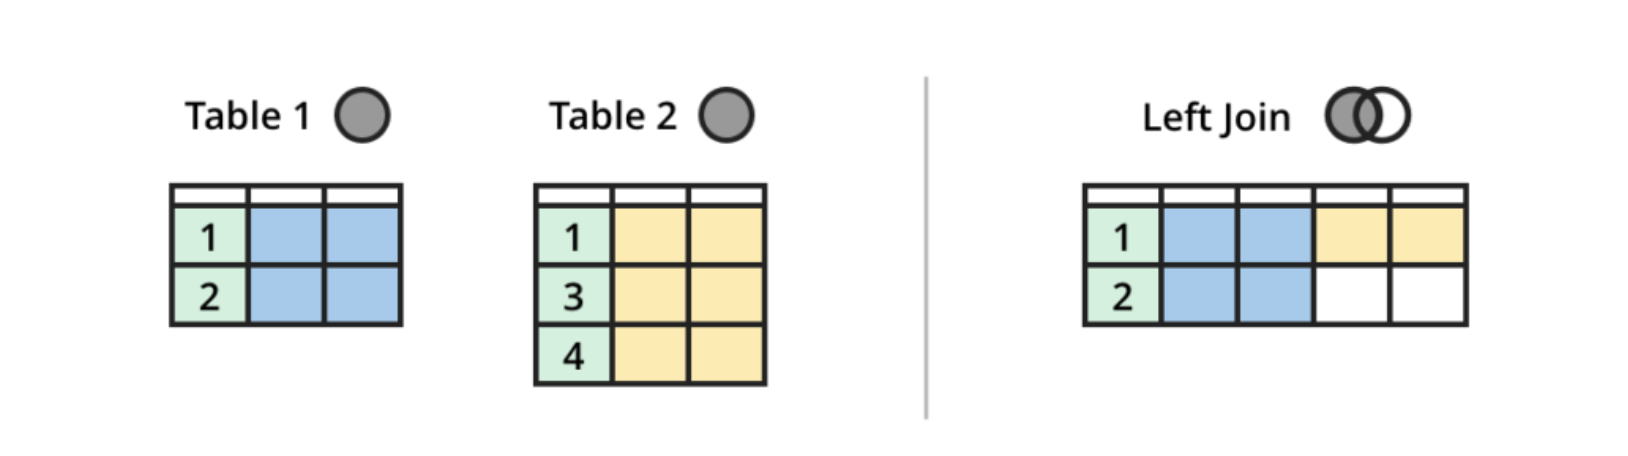

In [ ]:
# TODO: Create a left join

In [ ]:
# TODO: Create a right join

Try creating an `outer` join below. 

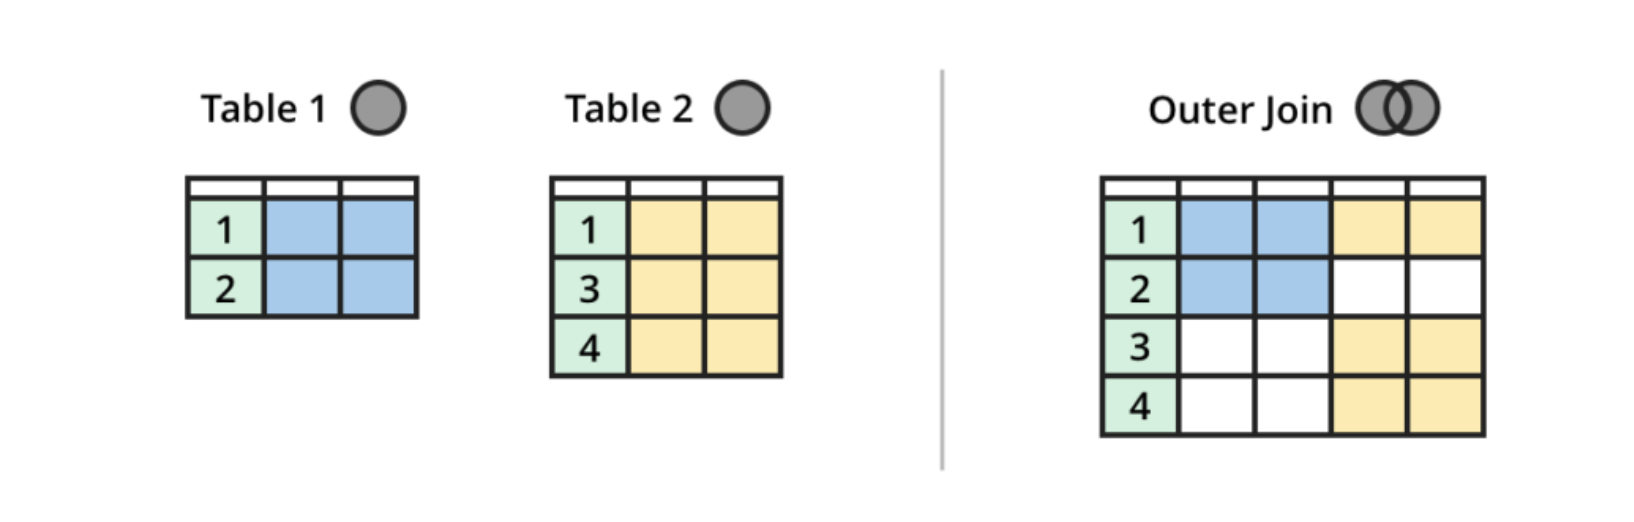

In [ ]:
# TODO: Create an outer join

Try creating an `inner` join below. 

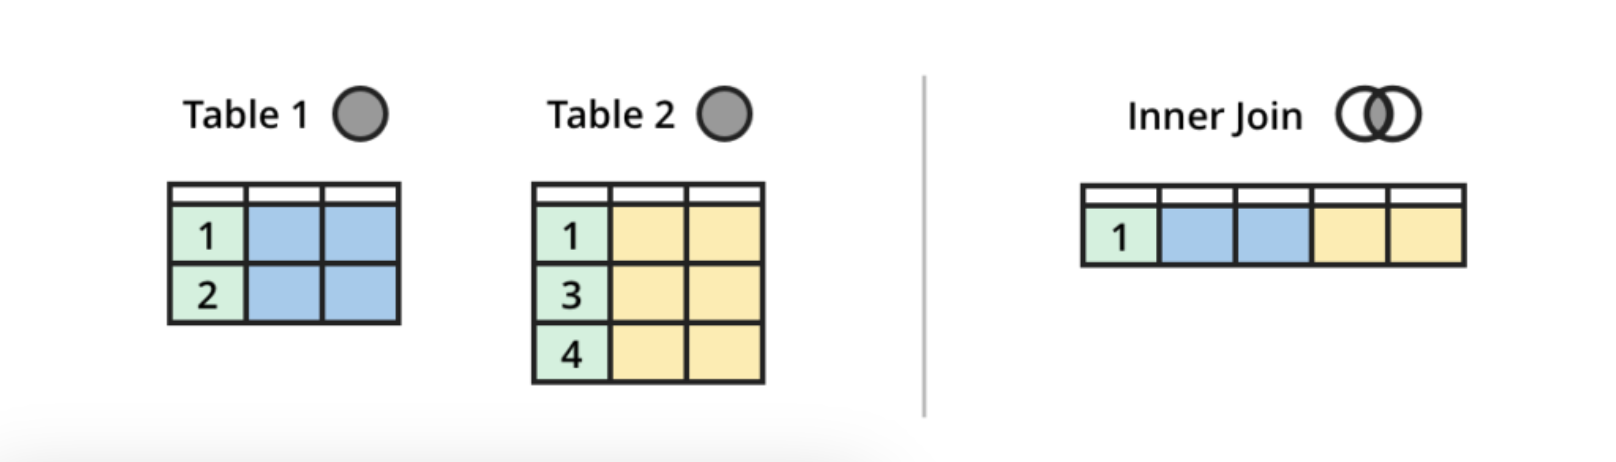

In [ ]:
# TODO: Create an inner join

Here's some simple examples of when we might want to use different types of merges.


Use LEFT or RIGHT merge when:

1. Starting with current data and adding additional context
2. Need to keep all current records, even without matches

Use INNER merge when:

1. Reconciling matching records between systems
2. All records must have data from both sources to be valid

Use OUTER merge when:

1. Need a complete view of all data
2. Don't want to miss any data from either source

Let's try a few more practice excericses using the two datasets below

1. Dataset 1: Active client accounts and their current balances
2. Dataset 2: Recent trade activity

In [22]:
# Client account balances
client_accounts = pd.DataFrame({
    'client_id': ['A001', 'A002', 'A003', 'A004', 'A005'],
    'client_name': ['John Smith', 'Emma Davis', 'Michael Chen', 'Sarah Wilson', 'James Moore'],
    'account_balance': [250000, 1500000, 750000, 50000, 2000000]
})

# Recent trading activity
recent_trades = pd.DataFrame({
    'client_id': ['A002', 'A003', 'A005', 'A005', 'A006'],
    'number_of_trades': [15, 3, 25, 10, 1],
    'total_trade_value': [350000, 50000, 1200000, 75000, 10000]
})

Create a new dataset that shows the client_name associated with each trade. Think about which merge is most appropriate.

In [23]:
# TODO Write your code here

trades = pd.merge(recent_trades, client_accounts, how='left', on='client_id')
trades

,client_id,number_of_trades,total_trade_value,client_name,account_balance
0,A002,15,350000,Emma Davis,1500000.0
1,A003,3,50000,Michael Chen,750000.0
2,A005,25,1200000,James Moore,2000000.0
3,A005,10,75000,James Moore,2000000.0
4,A006,1,10000,NaN,NaN


### VLOOKUP-Style Joins (Case-Insensitive)

Let's try to create a new dataset that shows the most recent trade for each client. We'd probably think that we should use a left merge because we want each entry from the `client_accounts` dataset. We'd be partially correct. Run the code below to see the outcome of using a left merge on these datasets. 

In [26]:
# Client account balances
client_accounts = pd.DataFrame({
    'client_id': ['A001', 'A002', 'A003', 'A004', 'A005'],
    'client_name': ['John Smith', 'Emma Davis', 'Michael Chen', 'Sarah Wilson', 'James Moore'],
    'account_balance': [250000, 1500000, 750000, 50000, 2000000]
})

# Recent trading activity
recent_trades = pd.DataFrame({
    'client_id': ['A002', 'A003', 'A005', 'A005', 'A006'],
    'number_of_trades': [15, 3, 25, 10, 1],
    'total_trade_value': [350000, 50000, 1200000, 75000, 10000]
})

df = pd.merge(client_accounts, recent_trades, how='left', on='client_id')
df

,client_id,client_name,account_balance,number_of_trades,total_trade_value
0,A001,John Smith,250000,NaN,NaN
1,A002,Emma Davis,1500000,15.0,350000.0
2,A003,Michael Chen,750000,3.0,50000.0
3,A004,Sarah Wilson,50000,NaN,NaN
4,A005,James Moore,2000000,25.0,1200000.0
5,A005,James Moore,2000000,10.0,75000.0


Notice that everything looks correct, expect we have two entries for the client with id `A005`. That's because the left join returns **all** matches, not just the first match. This is one of the two major difference between Excel's VLOOKUP formula and Pandas merge. 

Excel's Vlookup has two key differences from the pandas merge operation:
1. Excel's Vlookup matches each row in the left dataset with the first match in the right dataset, but Pandas merge returns as many new rows as their are matches.
2. Excel's Vlookup is case insensitive, but Pandas merge is case sensitive

Merge the datasets below together using `trading_position` as the left dataset and `symbol` as the merge key. Try to replicate VLOOKUP functionality.

Hint: You'll have to write some Python code beyond just the merge function. 

The correct output should look like this:

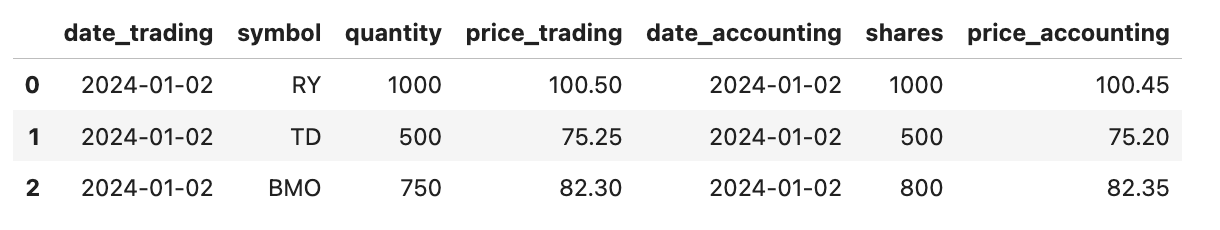

In [ ]:
# Trading system positions
trading_positions = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02'],
    'symbol': ['RY', 'TD', 'BMO'],
    'quantity': [1000, 500, 750],
    'price': [100.50, 75.25, 82.30]
})

# Accounting system positions
accounting_positions = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02', '2024-01-02'],
    'symbol': ['ry', 'TD', 'BMO', 'RY'],
    'shares': [1000, 500, 800, 1200],
    'price': [100.45, 75.20, 82.35, 101.70]
})

In [11]:
# TODO: Write your code here

# Convert the symbols to upper for case insensitive merge
trading_positions['symbol'] = trading_positions['symbol'].str.upper()
accounting_positions['symbol'] = accounting_positions['symbol'].str.upper()

# Drop duplicate symbols from the accounting_positions dataframe to ensure 
# we only get one result from each. Make a copy of the tmp_accounting_positions
# first so we don't edit the underlying data.
tmp_accounting_positions = accounting_positions.copy()
tmp_accounting_positions = tmp_accounting_positions.drop_duplicates(subset=['symbol'], keep='first')

basic_recon = trading_positions.merge(tmp_accounting_positions, on='symbol', suffixes=('_trading', '_accounting'))
basic_recon

,date_trading,symbol,quantity,price_trading,date_accounting,shares,price_accounting
0,2024-01-02,RY,1000,100.50,2024-01-02,1000,100.45
1,2024-01-02,TD,500,75.25,2024-01-02,500,75.20
2,2024-01-02,BMO,750,82.30,2024-01-02,800,82.35


### Finding Missing Values Between Datasets

Let's learn how to find records that exist in one dataset but not in another. This is a common task when performing data reconciliations.

To identify values that exist in one dataset and not the other, we can use the `indicator` paramaeter of the `merge` function. When we set `indicator=True`, pandas adds a column called _merge that tells us where each row came from:

- 'both': Record exists in both datasets
- 'left_only': Record only exists in the left dataset
- 'right_only': Record only exists in the right dataset

We can then filter on the `_merge` column to find values that exist in one dataframe and not the other.

Run the code cells below to see it in action.

In [33]:
trading_system = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03'],
    'symbol': ['RY', 'TD', 'BMO', 'RY', 'JPM'],
    'quantity': [1000, 500, 750, 1200, 300]
})

accounting_system = pd.DataFrame({
    'date': ['2024-01-02', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03'],
    'symbol': ['RY', 'TD', 'GS', 'RY', 'BAC'],  # Notice BMO is missing, and GS is extra
    'quantity': [1000, 500, 200, 1200, 450]
})

In [34]:
comparison = trading_system.merge(
    accounting_system,
    on=['date', 'symbol'],
    how='outer',
    indicator=True
)

comparison

,date,symbol,quantity_x,quantity_y,_merge
0,2024-01-02,BMO,750.0,NaN,left_only
1,2024-01-02,GS,NaN,200.0,right_only
2,2024-01-02,RY,1000.0,1000.0,both
3,2024-01-02,TD,500.0,500.0,both
4,2024-01-03,BAC,NaN,450.0,right_only
5,2024-01-03,JPM,300.0,NaN,left_only
6,2024-01-03,RY,1200.0,1200.0,both


Use the indicator column created above to separate the data into two new dataframes. One that only contains values unique to the left dataframe, and another that contains data uniqut to the right dataframe

In [35]:
# TODO: Write your code here 

values_only_in_trading_system = comparison[comparison['_merge'] == 'left_only']
values_only_in_trading_system

,date,symbol,quantity_x,quantity_y,_merge
1,2024-01-02,GS,NaN,200.0,right_only
4,2024-01-03,BAC,NaN,450.0,right_only


In [36]:
values_only_in_accounting_system = comparison[comparison['_merge'] == 'right_only']
values_only_in_accounting_system

,date,symbol,quantity_x,quantity_y,_merge
1,2024-01-02,GS,NaN,200.0,right_only
4,2024-01-03,BAC,NaN,450.0,right_only


### Practice

1. Which positions were sold during the tax year (realized gains/losses)
2. Which positions are still being held (unrealized gains/losses)
3. Which positions are newly acquired

In [28]:
import pandas as pd

# End of Year Positions for 2023
positions_2023 = pd.DataFrame({
    'security_id': ['US0378331005', 'US5949181045', 'US0605051046', 'US30231G1022', 'US46625H1005', 'US4581401001'],
    'security_name': ['APPLE INC', 'MICROSOFT CORP', 'BANK OF AMERICA', 'EXXON MOBIL', 'JPMORGAN CHASE', 'INTEL CORP'],
    'quantity': [500, 300, 1000, 400, 200, 400],
    'price': [150.25, 280.50, 45.75, 90.30, 140.25, 35.80],
    'acquisition_date': ['2021-06-15', '2022-03-20', '2022-08-10', '2023-01-15', '2023-03-22', '2023-06-30']
})

# End of Year Positions for 2024
positions_2024 = pd.DataFrame({
    'security_id': ['US0378331005', 'US5949181045', 'US4581401001', 'US46625H1005', 'US7427181091', 'US88160R1014'],
    'security_name': ['APPLE INC', 'MICROSOFT CORP', 'INTEL CORP', 'JPMORGAN CHASE', 'PROCTER & GAMBLE', 'TESLA INC'],
    'quantity': [500, 300, 600, 200, 350, 250],
    'price': [150.25, 280.50, 35.80, 140.25, 142.30, 220.50],
    'acquisition_date': ['2021-06-15', '2022-03-20', '2023-06-30', '2023-03-22', '2024-01-10', '2024-02-15']
})

Step 1:

1. Create a dataframe that only contains newly acquihired positions. Let's call this dataframe `new_positions`
2. Create a dataframe that only contains positions that were either completely sold off during 2024 or were held all of 2024. Let's call this dataframe `old_positions`

In [29]:
# Find changes in positions
comparison = positions_2023.merge(
    positions_2024,
    on='security_id',
    how='outer',
    indicator=True,
    suffixes=('_2023', '_2024')
)

# Find New Positions
new_positions = comparison[comparison['_merge'] == 'right_only']

# Find the old positions 
old_positions = comparison[comparison['_merge'] != 'right_only']

In [30]:
new_positions

,security_id,security_name_2023,quantity_2023,price_2023,acquisition_date_2023,security_name_2024,quantity_2024,price_2024,acquisition_date_2024,_merge
6,US7427181091,NaN,NaN,NaN,NaN,PROCTER & GAMBLE,350.0,142.3,2024-01-10,right_only
7,US88160R1014,NaN,NaN,NaN,NaN,TESLA INC,250.0,220.5,2024-02-15,right_only


In [31]:
old_positions

,security_id,security_name_2023,quantity_2023,price_2023,acquisition_date_2023,security_name_2024,quantity_2024,price_2024,acquisition_date_2024,_merge
0,US0378331005,APPLE INC,500.0,150.25,2021-06-15,APPLE INC,500.0,150.25,2021-06-15,both
1,US0605051046,BANK OF AMERICA,1000.0,45.75,2022-08-10,NaN,NaN,NaN,NaN,left_only
2,US30231G1022,EXXON MOBIL,400.0,90.30,2023-01-15,NaN,NaN,NaN,NaN,left_only
3,US4581401001,INTEL CORP,400.0,35.80,2023-06-30,INTEL CORP,600.0,35.80,2023-06-30,both
4,US46625H1005,JPMORGAN CHASE,200.0,140.25,2023-03-22,JPMORGAN CHASE,200.0,140.25,2023-03-22,both
5,US5949181045,MICROSOFT CORP,300.0,280.50,2022-03-20,MICROSOFT CORP,300.0,280.50,2022-03-20,both


Step 2: Create a new column in the `old_positions` dataframe called `change_in_holding_value`. Calculate the change in 

In [32]:
# TODO: Write your code here

# Calculate the initial holding value
old_positions['holding_value_2023'] = old_positions['quantity_2023'] * old_positions['price_2023']

# Calculate the ending holding value, if we sold the stock completely, the holding value is 0
old_positions['holding_value_2024'] = old_positions['quantity_2024'] * old_positions['price_2024']
old_positions['holding_value_2024'] = old_positions['holding_value_2024'].fillna(0)

# Calculate change in holding value
old_positions['change_in_holding_value'] = old_positions['holding_value_2024'] - old_positions['holding_value_2023']

# Drop the helper columns
old_positions = old_positions.drop(['holding_value_2023', 'holding_value_2024'], axis=1)
old_positions

,security_id,security_name_2023,quantity_2023,price_2023,acquisition_date_2023,security_name_2024,quantity_2024,price_2024,acquisition_date_2024,_merge,change_in_holding_value
0,US0378331005,APPLE INC,500.0,150.25,2021-06-15,APPLE INC,500.0,150.25,2021-06-15,both,0.0
1,US0605051046,BANK OF AMERICA,1000.0,45.75,2022-08-10,NaN,NaN,NaN,NaN,left_only,-45750.0
2,US30231G1022,EXXON MOBIL,400.0,90.30,2023-01-15,NaN,NaN,NaN,NaN,left_only,-36120.0
3,US4581401001,INTEL CORP,400.0,35.80,2023-06-30,INTEL CORP,600.0,35.80,2023-06-30,both,7160.0
4,US46625H1005,JPMORGAN CHASE,200.0,140.25,2023-03-22,JPMORGAN CHASE,200.0,140.25,2023-03-22,both,0.0
5,US5949181045,MICROSOFT CORP,300.0,280.50,2022-03-20,MICROSOFT CORP,300.0,280.50,2022-03-20,both,0.0


Step 3: 

1. Create a new dataframe called `big_movers` that contains all of the stocks whose change in holding value has a greater than 10,000 magnitude change
2. Create a new dataframe called `immaterial_movers` that contains all of the remaining stock that had a less than 10,000 magnitude change

In [35]:
# TODO: Write your code here

big_movers = old_positions[abs(old_positions['change_in_holding_value']) >= 10000]
big_movers

,security_id,security_name_2023,quantity_2023,price_2023,acquisition_date_2023,security_name_2024,quantity_2024,price_2024,acquisition_date_2024,_merge,change_in_holding_value
1,US0605051046,BANK OF AMERICA,1000.0,45.75,2022-08-10,NaN,NaN,NaN,NaN,left_only,-45750.0
2,US30231G1022,EXXON MOBIL,400.0,90.30,2023-01-15,NaN,NaN,NaN,NaN,left_only,-36120.0


In [36]:
immaterial_movers = old_positions[abs(old_positions['change_in_holding_value']) < 10000]
immaterial_movers

,security_id,security_name_2023,quantity_2023,price_2023,acquisition_date_2023,security_name_2024,quantity_2024,price_2024,acquisition_date_2024,_merge,change_in_holding_value
0,US0378331005,APPLE INC,500.0,150.25,2021-06-15,APPLE INC,500.0,150.25,2021-06-15,both,0.0
3,US4581401001,INTEL CORP,400.0,35.80,2023-06-30,INTEL CORP,600.0,35.80,2023-06-30,both,7160.0
4,US46625H1005,JPMORGAN CHASE,200.0,140.25,2023-03-22,JPMORGAN CHASE,200.0,140.25,2023-03-22,both,0.0
5,US5949181045,MICROSOFT CORP,300.0,280.50,2022-03-20,MICROSOFT CORP,300.0,280.50,2022-03-20,both,0.0


Step 4: Create an Excel file with three tabs in it
1. `big_movers`
2. `immaterial_movers`
3. `new_positions`


In [ ]:
# TODO: Write your code here

with pd.ExcelWriter('positions_analysis.xlsx') as writer:
    big_movers.to_excel(writer, sheet_name='big_movers', index=False)
    immaterial_movers.to_excel(writer, sheet_name='immaterial_movers', index=False)
    new_positions.to_excel(writer, sheet_name='new_positions', index=False)

# Aggregating Data

There are two main functions that pandas has for aggregating data: `groupby` and `pivot_table`. You can use either of them for most use cases, but I generally find `pivot_tables` to be a bit more straight forward and easy to work with, so we'll focus our energy there. 

Run the next two code cells to make a pivot table that calculates the total trading `pnl` for each `sector` in the data below.

In [38]:
import pandas as pd
trading_data = pd.DataFrame({
    'date': ['2024-01-15', '2024-01-15', '2024-01-15', '2024-01-16', '2024-01-16', '2024-01-16', '2024-01-17', '2024-01-17', '2024-01-17', '2024-01-18', '2024-01-18', '2024-01-18', '2024-01-19', '2024-01-19', '2024-01-19', '2024-01-20', '2024-01-20', '2024-01-20', '2024-01-21', '2024-01-21'],
    'trader': ['John', 'Sarah', 'John', 'John', 'Sarah', 'Sarah', 'Tamir', 'Tamir', 'Tamir', 'John', 'Sarah', 'Tamir', 'John', 'Sarah', 'Tamir', 'John', 'Sarah', 'Tamir', 'John', 'Sarah'],
    'sector': ['Tech', 'Finance', 'Energy', 'Tech', 'Energy', 'Tech', 'Finance', 'Tech', 'Energy', 'Tech', 'Finance', 'Energy', 'Tech', 'Finance', 'Energy', 'Tech', 'Finance', 'Energy', 'Tech', 'Finance'],
    'volume': [1000, 1500, 750, 1200, 900, 1100, 1300, 1400, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700],
    'pnl': [5000, -2000, 1500, -1000, 3000, 2000, 2500, -1500, 3500, -500, 4000, -3000, 4500, -1000, 500, 6000, -7000, 8000, -9000, 10000]
})

trading_data

,date,trader,sector,volume,pnl
0,2024-01-15,John,Tech,1000,5000
1,2024-01-15,Sarah,Finance,1500,-2000
2,2024-01-15,John,Energy,750,1500
3,2024-01-16,John,Tech,1200,-1000
4,2024-01-16,Sarah,Energy,900,3000
5,2024-01-16,Sarah,Tech,1100,2000
6,2024-01-17,Tamir,Finance,1300,2500
7,2024-01-17,Tamir,Tech,1400,-1500
8,2024-01-17,Tamir,Energy,1600,3500
9,2024-01-18,John,Tech,1700,-500


In [39]:
# Create a pivot table 
pivot = trading_data.pivot_table(
    index=['sector'], 
    values=['pnl'], 
    aggfunc=['sum']
)

pivot

,sum
,pnl
sector,
Energy,13500
Finance,6500
Tech,5500


There are two important things to notice about the code above: 

1. The column headers have multiple rows. These are called multi indexed column headers. This happens because pivot tables are designed to support multiple aggregation methods for each column. For example, instead of just calculating the sum of the `pnl` groups, we could also calculate average.
2. The index of the dataframe is no longer 0, 1, 2, ... etc. Instead, the index is now the sector column. 

Both of these make the dataframe hard to work with. So whenever we create a pivot table, it's good practice to flatten the column headers and reset the indexes afterwards. 

In [38]:
pivot = trading_data.pivot_table(
    index=['sector'], 
    values=['pnl'], 
    aggfunc=['sum']
)

# Reset the indexes
pivot = pivot.reset_index()

# Flatten column headers so they are not tuples
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,sector,sum pnl
0,Energy,13500
1,Finance,6500
2,Tech,5500


Doing this makes our dataframe nice and easy to work with again.

Create a pivot table that aggregates the trading_data by `trader` and calculates their `mean` `pnl`

In [43]:
# TODO Write your code here

pivot = trading_data.pivot_table(
    index=['trader'], 
    values=['pnl'], 
    aggfunc=['mean']
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,mean pnl
0,John,928.571429
1,Sarah,1285.714286
2,Tamir,1666.666667


Now try updating the pivot table so that it groups the data by `trader` and `sector`

In [42]:
# TODO Write your code here

pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=['mean']
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,mean pnl
0,John,Energy,1500.000000
1,John,Tech,833.333333
2,Sarah,Energy,3000.000000
3,Sarah,Finance,800.000000
4,Sarah,Tech,2000.000000
5,Tamir,Energy,2250.000000
6,Tamir,Finance,2500.000000
7,Tamir,Tech,-1500.000000


Update the pivot table again so that it groups the data by `trader` and `sector`, and calculates the `sum` and `mean` of their `pnl`

In [41]:
# TODO Write your code here

pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=['sum', 'mean']
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,sum pnl,mean pnl
0,John,Energy,1500,1500.000000
1,John,Tech,5000,833.333333
2,Sarah,Energy,3000,3000.000000
3,Sarah,Finance,4000,800.000000
4,Sarah,Tech,2000,2000.000000
5,Tamir,Energy,9000,2250.000000
6,Tamir,Finance,2500,2500.000000
7,Tamir,Tech,-1500,-1500.000000


### Calculating subtotals in pivot tables

To add a subtotal row to our pivot tables, we can set `margins=True`. It will add a new row to the bottom of the pivot table that shows the aggregated values for the entire source data, not just each bucket.


In [50]:
pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=['sum', 'mean'],
    margins=True
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,sum pnl,mean pnl
0,John,Energy,1500,1500.000000
1,John,Tech,5000,833.333333
2,Sarah,Energy,3000,3000.000000
3,Sarah,Finance,4000,800.000000
4,Sarah,Tech,2000,2000.000000
5,Tamir,Energy,9000,2250.000000
6,Tamir,Finance,2500,2500.000000
7,Tamir,Tech,-1500,-1500.000000
8,All,,25500,1275.000000


**Its important to remember that, when you use `margins=True`, pandas calculates the "All" value using the same aggregation type used by that column.** 

For sum pnl column: it takes all the original pnl values from trading_data and sums them

For mean pnl column: it takes ALL the original pnl values from trading_data and calculates their mean

Note that in both cases, it is calculating the aggregated statistic on the original data, not on already aggregated values. This is exactly the same as Excel. The pivot table we just created is the same as this following pivot table 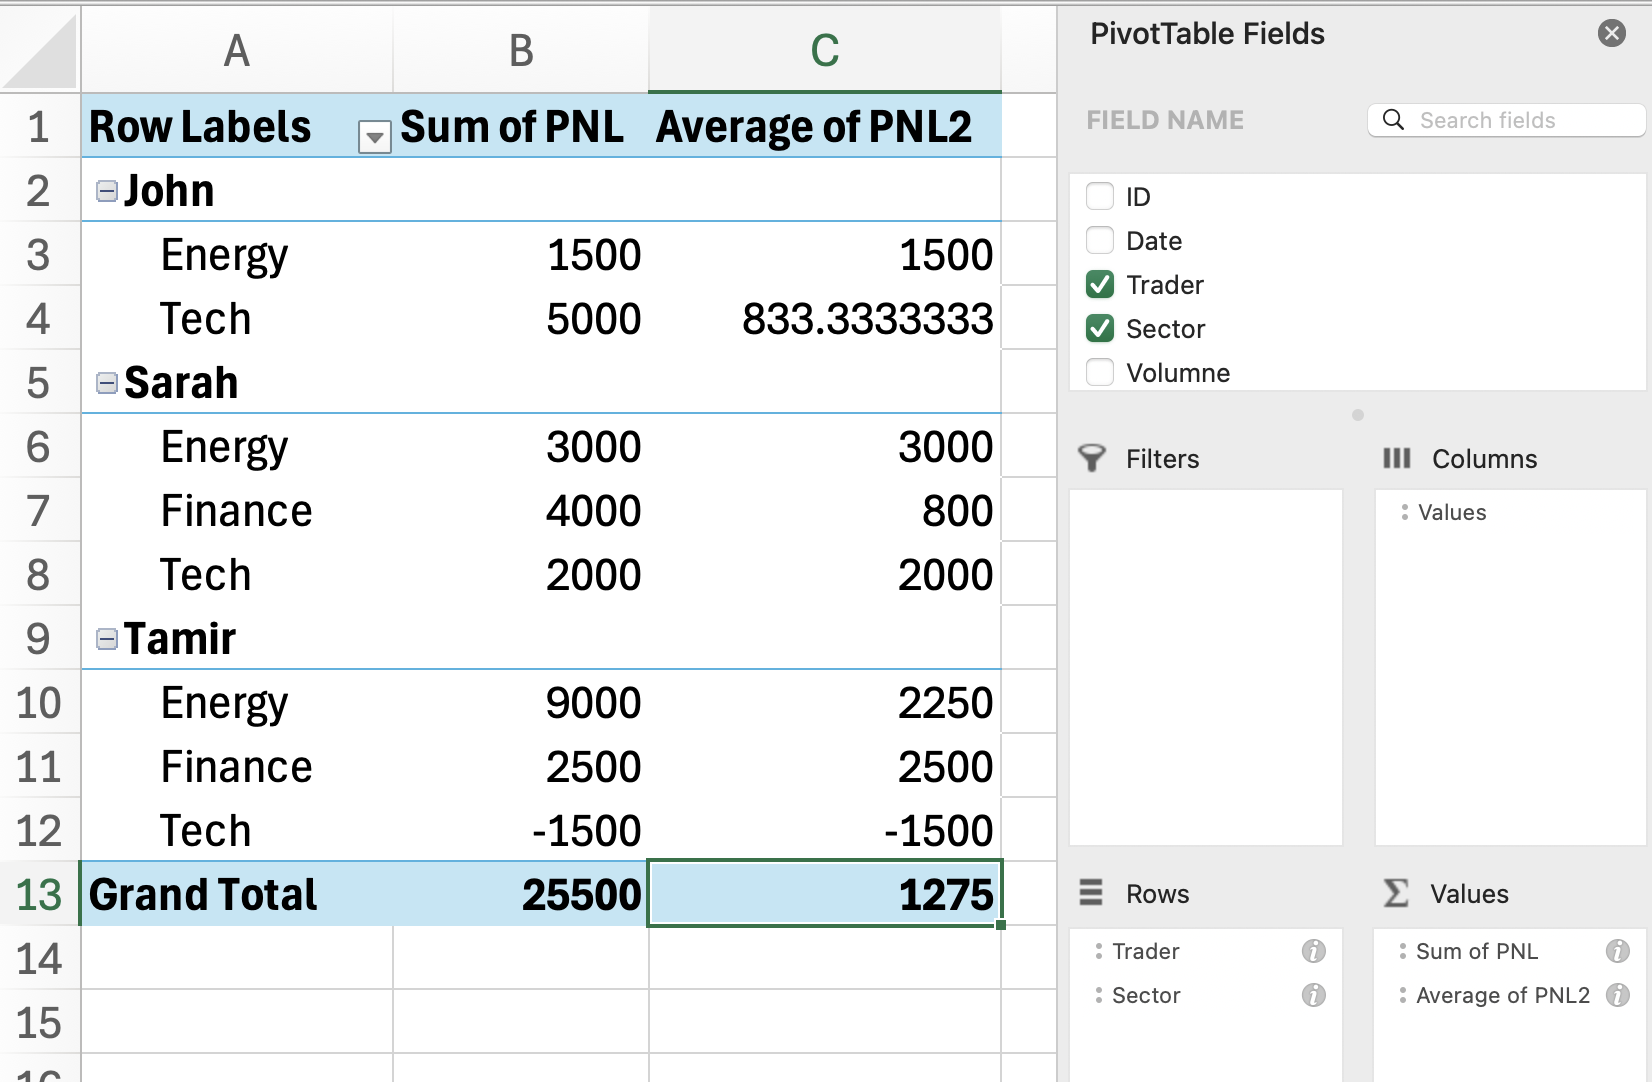

To make our pivot table even closer to the Excel pivot table, we can change the name of the margins row from All to Grand Total. 

To do so, try setting the parameteter `margins_name`.

In [4]:
pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=['sum', 'mean'],
    margins=True,
    margins_name='Grand Total'
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,sum pnl,mean pnl
0,John,Energy,1500,1500.000000
1,John,Tech,5000,833.333333
2,Sarah,Energy,3000,3000.000000
3,Sarah,Finance,4000,800.000000
4,Sarah,Tech,2000,2000.000000
5,Tamir,Energy,9000,2250.000000
6,Tamir,Finance,2500,2500.000000
7,Tamir,Tech,-1500,-1500.000000
8,Grand Total,,25500,1275.000000


### Creating our own aggregation functions

Pandas has basic, built-in pivot table aggregation functions like: 
- sum
- mean 
- median
- min
- max
- count
- nunique
- std
- var
- first
- last
- prod

Sometimes we'll want to perform more bespoke, complex aggregations. In those cases, we can create ourselves an aggregation function and use it in our pivot tables. To understand how these functions get used by pandas, let's break down the steps that pandas takes to create the pivot table. We can think of it this way:

1. Pandas uses the `index` values to group the data into buckets.
2. Pandas creates a temporary dataframe for each bucket of data. It contains all of the columns from the original dataframe and only the rows that belong to that bucket.
3. Pandas calculates the aggregated values for each bucket by passing the column from the bucketed dataframe to an aggregation function.

What this tells us is that in order to build an aggregation function, we need to create a function that receives a series of data and returns some value as a result. 

In the code cell below, we created a custom aggregation function to calculate the sum. This is of course a silly example because pandas already supports the sum aggregation, but it will let us see how custom aggregation functions work. 

It's a two step process: 

1. Create the function
2. Use the function in the `aggfunc` param of the pivot table

In [52]:
def custom_sum_agg_function(series):
    return series.sum() 

pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=[custom_sum_agg_function],
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,custom_sum_agg_function pnl
0,John,Energy,1500
1,John,Tech,5000
2,Sarah,Energy,3000
3,Sarah,Finance,4000
4,Sarah,Tech,2000
5,Tamir,Energy,9000
6,Tamir,Finance,2500
7,Tamir,Tech,-1500


Create a new aggregation function called `hit_ratio` that returns the percentage of profitable trades (pnl > 0) in each bucket.

In [5]:
# TODO Write your code here

def hit_ratio(series):
    # Count the number of entries greater than 0
    positive_entries = len(series[series > 0])

    # Count the total number of entries in the bucket
    total_entries = len(series)

    # Calculate the percentage 
    return positive_entries / total_entries * 100

pivot = trading_data.pivot_table(
    index=['trader', 'sector'], 
    values=['pnl'], 
    aggfunc=[hit_ratio],
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,trader,sector,hit_ratio pnl
0,John,Energy,100.0
1,John,Tech,50.0
2,Sarah,Energy,100.0
3,Sarah,Finance,40.0
4,Sarah,Tech,100.0
5,Tamir,Energy,75.0
6,Tamir,Finance,100.0
7,Tamir,Tech,0.0


Create an aggregation function called `average_sharp_ratio` that returns the average sharp ratio for each bucket. 

Calcualte the sharp ratio using the formula: 

(returns - risk free rate) / standard deviation

Use the risk free rate of 3%

Build a pivot table that shows the average sharp ratio for each sector. 

In [41]:
returns_df = pd.DataFrame({
    "Symbol": ["AAPL", "AMZN", "MSFT", "GOOG", "JPM", "GS", "XOM", "CVX", "JNJ", "PFE"],
    "Sector": ["Tech", "Tech", "Tech", "Tech", "Finance", "Finance", "Energy", "Energy", "Healthcare", "Healthcare"],
    "Returns": [0.15, 0.18, 0.12, 0.16, 0.07, 0.10, 0.09, 0.11, 0.06, 0.05]
})

In [43]:
# TODO Write your code here

risk_free_rate = 0.03
def average_sharp_ratio(series):
    std = series.std()
    sharp_ratios = (series - risk_free_rate) / std
    return sharp_ratios.mean()

pivot = returns_df.pivot_table(
    index='Sector',
    values='Returns', 
    aggfunc=[average_sharp_ratio]
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]
pivot

,Sector,average_sharp_ratio Returns
0,Energy,4.949747
1,Finance,2.592725
2,Healthcare,3.535534
3,Tech,4.900000


### Practice 1: Top 10 Holdings Report

Notice that in all of the pivot table examples so far, we've ended up with a new dataframe. Often though, what we really want to do is calculate some aggregated statistics and include it in our original data. This is often the case when we see a SUMIF function in Excel. 

If we think about the SUMIF formula, what its doing is bucketing values, calculating the sum of each bucket and returning the result. To replicate this in Python, we can combine a pivot table calculation with a merge. 

Imagine that your job is to build the top 10 holdings report for a fund that holds a variety of equities across a few different sectors. 

Your job is to build a report that has the following columns: 

1. ticker
2. sector
3. position_value
4. pct_of_sector (calculated as the position_value of that holding divided by the total position_value of the sector) 

Your final report should only contains the 10 holdings with the highest position_value.

<details>
  <summary>If you get stuck, expand me for a hint.  </summary>

    If you're not sure how to start, try following these steps:

    1. Calculate a new column in the `holdings` dataframe called `position_value`
    2. Create a pivot table that groups the data by `sector` and calculates the total `position_value` for each position. 
    3. Merge the pivot table back into the original dataframe so that each row now has its corresponding total sector position
    4. Create a new column called `pct_of_sector` that is the position_value divided by the total sector position value
    5. Drop all of the unused columns
    6. Sort the data in descending order of position_value
    7. Only keep the top 10 rows
</details>

<details>
  <summary>Expand me to see the final result we're aiming for</summary>

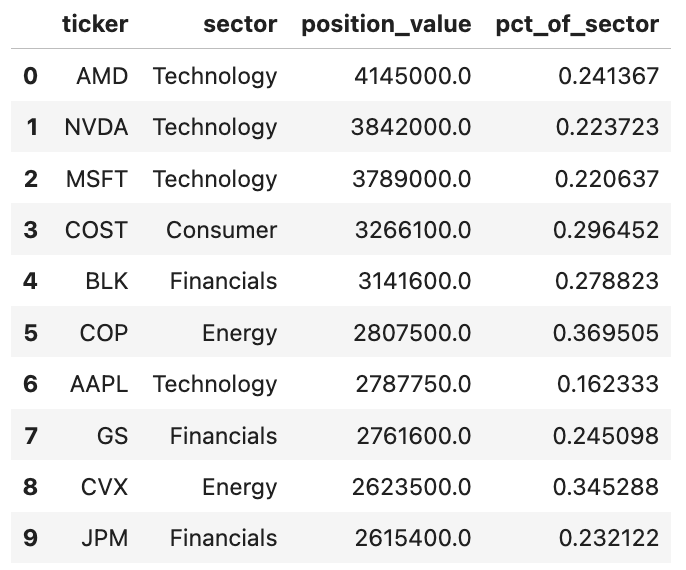

</details>



In [90]:
import pandas as pd

holdings = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMD', 'CRM', 'JPM', 'BAC', 'GS', 'MS', 'BLK', 'JNJ', 'PFE', 'UNH', 'ABBV', 'AMZN', 'COST', 'WMT', 'MCD', 'NKE', 'XOM', 'CVX', 'COP'],
    'sector': ['Technology', 'Technology', 'Technology', 'Technology', 'Technology', 'Technology', 'Financials', 'Financials', 'Financials', 'Financials', 'Financials', 'Healthcare', 'Healthcare', 'Healthcare', 'Healthcare', 'Consumer', 'Consumer', 'Consumer', 'Consumer', 'Consumer', 'Energy', 'Energy', 'Energy'],
    'shares': [15000, 12000, 2500, 8000, 25000, 10000, 18000, 45000, 8000, 15000, 4000, 12000, 35000, 5000, 15000, 6000, 4500, 15000, 8000, 20000, 22000, 18000, 25000],
    'price': [185.85, 315.75, 140.10, 480.25, 165.80, 225.90, 145.30, 32.50, 345.20, 85.75, 785.40, 158.90, 28.75, 480.25, 168.90, 155.75, 725.80, 165.30, 285.90, 102.50, 98.50, 145.75, 112.30]
})

In [91]:
# TODO Write your code here

# Calculate a new column in the `holdings` dataframe called `position_value`
holdings['position_value'] = holdings['shares'] * holdings['price']

# Create a pivot table that groups the data by `sector` and calculates the total `position_value` for each position.
pivot = holdings.pivot_table(
    index='sector', 
    values='position_value', 
    aggfunc=['sum']
)

pivot = pivot.reset_index()
pivot.columns = [' '.join(col).strip() for col in pivot.columns.values]

# Merge the pivot table back into the original dataframe so that each row now has its corresponding total sector position
holdings = holdings.merge(pivot, on='sector', how='left')

# Create a new column called `pct_of_sector` that is the position_value divided by the total sector position value
holdings['pct_of_sector'] = holdings['position_value'] / holdings['sum position_value']

# Drop all of the unused columns
holdings = holdings.drop(columns=['shares', 'price', 'sum position_value'])

# Sort the data in descending order of position_value
holdings = holdings.sort_values(by='position_value', ascending=False, ignore_index=True)

# Only keep the top 10 rows
holdings.head(10)

,ticker,sector,position_value,pct_of_sector
0,AMD,Technology,4145000.0,0.241367
1,NVDA,Technology,3842000.0,0.223723
2,MSFT,Technology,3789000.0,0.220637
3,COST,Consumer,3266100.0,0.296452
4,BLK,Financials,3141600.0,0.278823
5,COP,Energy,2807500.0,0.369505
6,AAPL,Technology,2787750.0,0.162333
7,GS,Financials,2761600.0,0.245098
8,CVX,Energy,2623500.0,0.345288
9,JPM,Financials,2615400.0,0.232122


# Practice 2: Desk and Sector Risk Analysis

Imagine your job is to analyze trading activity to understand the exposure to different trading desks and sectors. 

Step 1: Calculate total exposure:
    
    - Add a column called 'trade_pct_of_total' showing each trade's percentage of total notional


<br>
<br>
<br>
Step 2: Calculate desk concentrations:
    
    - Create a pivot table showing total notional by desk
    - Add a column called `desk_pct_of_total` showing each desk's percentage of total notional

<br>
<br>
<br>
Step 3: Calculate sector concentrations within each desk:

    - Create a pivot table showing total notional by desk and sector
    - Add a column called `desk_and_sector_pct_of_total` showing each (desk, sector) pair's percentage of total notional


<br>
<br>
<br>
Step 4: Create an Excel Report

    - Generate a new Excel file that has 3 sheets, one for each dataframe



In [135]:
trades = pd.DataFrame({
    'trade_id': ['T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007', 'T008', 'T009', 'T010', 'T011', 'T012', 'T013', 'T014', 'T015'],
    'desk': ['Equities', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income', 'Equities', 'Fixed Income'],
    'sector': ['Technology', 'Financials', 'Government', 'Technology', 'Government', 'Consumer', 'Government', 'Technology', 'Government', 'Financials', 'Government', 'Consumer', 'Government', 'Technology', 'Government'],
    'notional': [10000000, 2000000, 5000000, 1500000, 3000000, 2500000, 4000000, 1800000, 3500000, 2200000, 4500000, 1600000, 3800000, 1200000, 4200000]
})

In [136]:
# Step 1: Calculate total exposure
total_notional = trades['notional'].sum()
trades['trade_pct_of_total'] = trades['notional'] / total_notional

# Sort the dataframe in descending order
trades = trades.sort_values(by='trade_pct_of_total', ascending=False, ignore_index=True)
trades

,trade_id,desk,sector,notional,trade_pct_of_total
0,T001,Equities,Technology,10000000,0.196850
1,T003,Fixed Income,Government,5000000,0.098425
2,T011,Fixed Income,Government,4500000,0.088583
3,T015,Fixed Income,Government,4200000,0.082677
4,T007,Fixed Income,Government,4000000,0.078740
5,T013,Fixed Income,Government,3800000,0.074803
6,T009,Fixed Income,Government,3500000,0.068898
7,T005,Fixed Income,Government,3000000,0.059055
8,T006,Equities,Consumer,2500000,0.049213
9,T010,Equities,Financials,2200000,0.043307


In [137]:
# Step 2: Calculate desk concentrations
desk_exposure = trades.pivot_table(
    index='desk',
    values='notional',
    aggfunc=['sum']
)

desk_exposure = desk_exposure.reset_index()
desk_exposure.columns = [' '.join(col).strip() for col in desk_exposure.columns.values]

desk_exposure['desk_pct_of_total'] = desk_exposure['sum notional'] / total_notional * 100

# Sort the dataframe in descending order
desk_exposure = desk_exposure.sort_values(by='desk_pct_of_total', ascending=False, ignore_index=True)
desk_exposure

,desk,sum notional,desk_pct_of_total
0,Fixed Income,28000000,55.11811
1,Equities,22800000,44.88189


In [138]:
# Step 3: Calculate sector concentrations within each desk

desk_and_sector_exposure = trades.pivot_table(
    index=['desk', 'sector'],
    values='notional',
    aggfunc=['sum']
)

desk_and_sector_exposure = desk_and_sector_exposure.reset_index()
desk_and_sector_exposure.columns = [' '.join(col).strip() for col in desk_and_sector_exposure.columns.values]

desk_and_sector_exposure['desk_and_sector_pct_of_total'] = desk_and_sector_exposure['sum notional'] / total_notional * 100

# Sort the dataframe in descending order
desk_and_sector_exposure = desk_and_sector_exposure.sort_values(by='desk_and_sector_pct_of_total', ascending=False, ignore_index=True)
desk_and_sector_exposure

,desk,sector,sum notional,desk_and_sector_pct_of_total
0,Fixed Income,Government,28000000,55.118110
1,Equities,Technology,14500000,28.543307
2,Equities,Financials,4200000,8.267717
3,Equities,Consumer,4100000,8.070866


In [139]:
# Step 4: Generate an Excel file

with pd.ExcelWriter('desk-and-sector-risk.xlsx') as writer:
    trading_data.to_excel(writer, sheet_name='Trading Data', index=False)
    holdings.to_excel(writer, sheet_name='Holdings', index=False)
    returns_df.to_excel(writer, sheet_name='Returns', index=False)